# **Dataset 2 - Gold Price - EDA and Data Preparation**

**Description**
The Gold Price Prediction dataset provides historical financial
data, including daily prices of various financial instruments such as stocks, com-
modities, and indices. It spans from 2010 to 2024, comprising approximately
3904 data samples. Each data sample includes features such as opening and
closing prices, highest and lowest prices of the day, trading volume, and other
relevant financial indicators. The time-series nature of this data allows for
in-depth analysis of trends and patterns over time, making it suitable for fore-
casting future prices or returns.

**Source**
https://www.kaggle.com/datasets/franciscogcc/financial-data/data

**Machine Learning Task**
Regression

**Motivation**
It is fascinating to observe correlations between major indices
like the S&P 500 and Nasdaq, as well as the behavior of individual stocks. This
dataset provides an opportunity to explore financial market trends and predic-
tions.

**Objective**
Utilize historical financial data to predict future prices or returns
of specific financial instruments, aiding in investment decisions and risk man-
agement.

The two machine learning models that will be used in this regression task are Polynomial Regression and Linear Regression (both regularized).

In [55]:
# Imports
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
import seaborn as sns
import nltk
from collections import defaultdict, Counter
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import time

In [56]:
df = pd.read_csv("financial_regression.csv")
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [57]:
# Exploring the shape and information
print(f"This dataset has {df.shape[0]} data samples and {df.shape[1]} features.")

This dataset has 3904 data samples and 47 features.


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [59]:
# Check how many null values for each column
df.isnull().sum()

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

In [60]:
# Different granularity in time + missing rows -> fill in missing values with most recent previous (ffill)
df = df.ffill()
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [61]:
# Columns had missing values and ffill can't fill them in, so remove such rows as guessing interest rates before first available interest rate is not feasible.
df = df[~df.isna().any(axis=1)]

# Reset the index
df = df.reset_index(drop=True)

df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-04-01,117.80,118.25,117.10,117.80,161083608.0,1.15,48.34,48.70,47.79,...,49.32,48.7730,48.92,135299.0,0.5470,109.97,110.4700,109.92,110.26,11370417.0
1,2010-04-02,117.80,118.25,117.10,117.80,161083608.0,1.15,48.34,48.70,47.79,...,49.32,48.7730,48.92,135299.0,0.5470,109.97,110.4700,109.92,110.26,11370417.0
2,2010-04-05,118.25,118.84,117.92,118.76,105621743.0,0.92,48.26,48.72,48.14,...,50.98,49.1100,50.38,191249.0,1.8700,110.56,110.9837,110.27,110.89,8207564.0
3,2010-04-06,118.42,119.25,118.29,119.04,110194919.0,0.96,48.49,48.90,48.39,...,51.10,50.3101,50.81,226947.0,0.7899,110.89,111.5100,110.83,111.03,10321993.0
4,2010-04-07,118.80,119.36,117.81,118.36,184432309.0,1.55,48.69,48.87,48.37,...,51.23,50.5101,50.89,483783.0,0.7199,111.85,112.9300,111.77,112.49,19127617.0


In [62]:
# Need to convert dates to standardized format
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-04-01,117.80,118.25,117.10,117.80,161083608.0,1.15,48.34,48.70,47.79,...,49.32,48.7730,48.92,135299.0,0.5470,109.97,110.4700,109.92,110.26,11370417.0
1,2010-04-02,117.80,118.25,117.10,117.80,161083608.0,1.15,48.34,48.70,47.79,...,49.32,48.7730,48.92,135299.0,0.5470,109.97,110.4700,109.92,110.26,11370417.0
2,2010-04-05,118.25,118.84,117.92,118.76,105621743.0,0.92,48.26,48.72,48.14,...,50.98,49.1100,50.38,191249.0,1.8700,110.56,110.9837,110.27,110.89,8207564.0
3,2010-04-06,118.42,119.25,118.29,119.04,110194919.0,0.96,48.49,48.90,48.39,...,51.10,50.3101,50.81,226947.0,0.7899,110.89,111.5100,110.83,111.03,10321993.0
4,2010-04-07,118.80,119.36,117.81,118.36,184432309.0,1.55,48.69,48.87,48.37,...,51.23,50.5101,50.89,483783.0,0.7199,111.85,112.9300,111.77,112.49,19127617.0


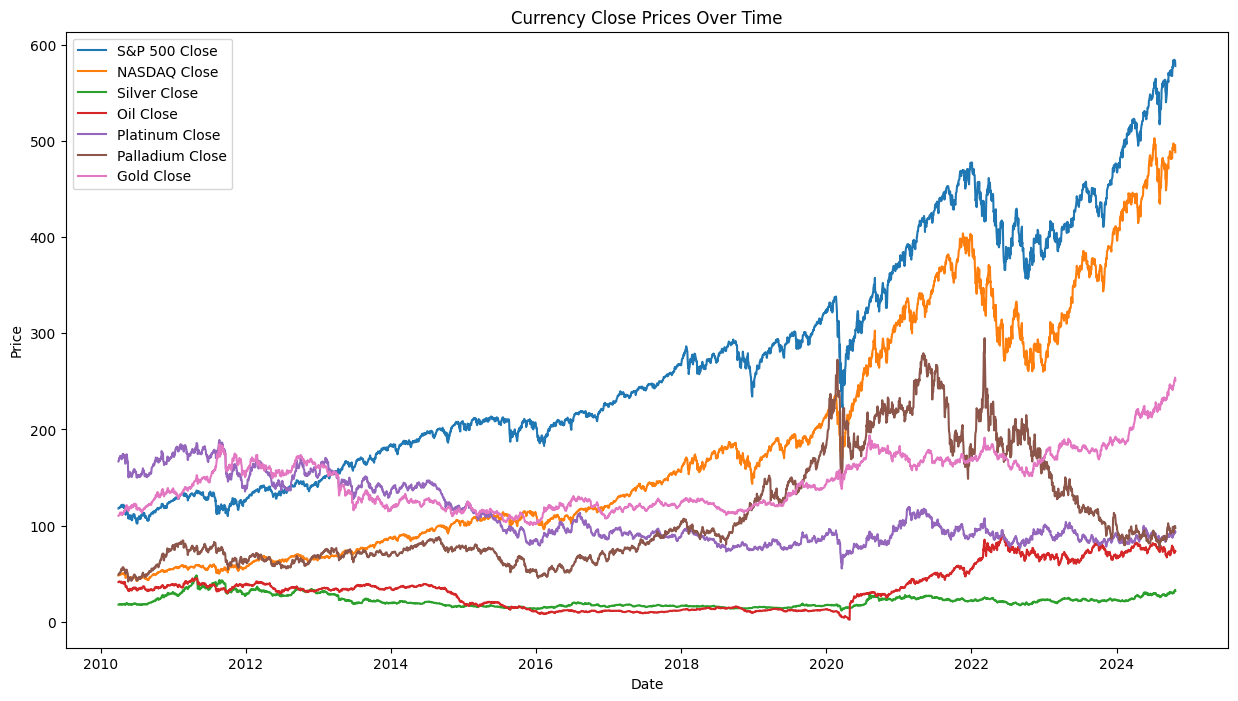

In [63]:
# All closes over time
plt.figure(figsize=(15, 8))
plt.plot(df['date'].values, df['sp500 close'].values, label='S&P 500 Close')
plt.plot(df['date'].values, df['nasdaq close'].values, label='NASDAQ Close')
plt.plot(df['date'].values, df['silver close'].values, label='Silver Close')
plt.plot(df['date'].values, df['oil close'].values, label='Oil Close')
plt.plot(df['date'].values, df['platinum close'].values, label='Platinum Close')
plt.plot(df['date'].values, df['palladium close'].values, label='Palladium Close')
plt.plot(df['date'].values, df['gold close'].values, label='Gold Close')
plt.title("Currency Close Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

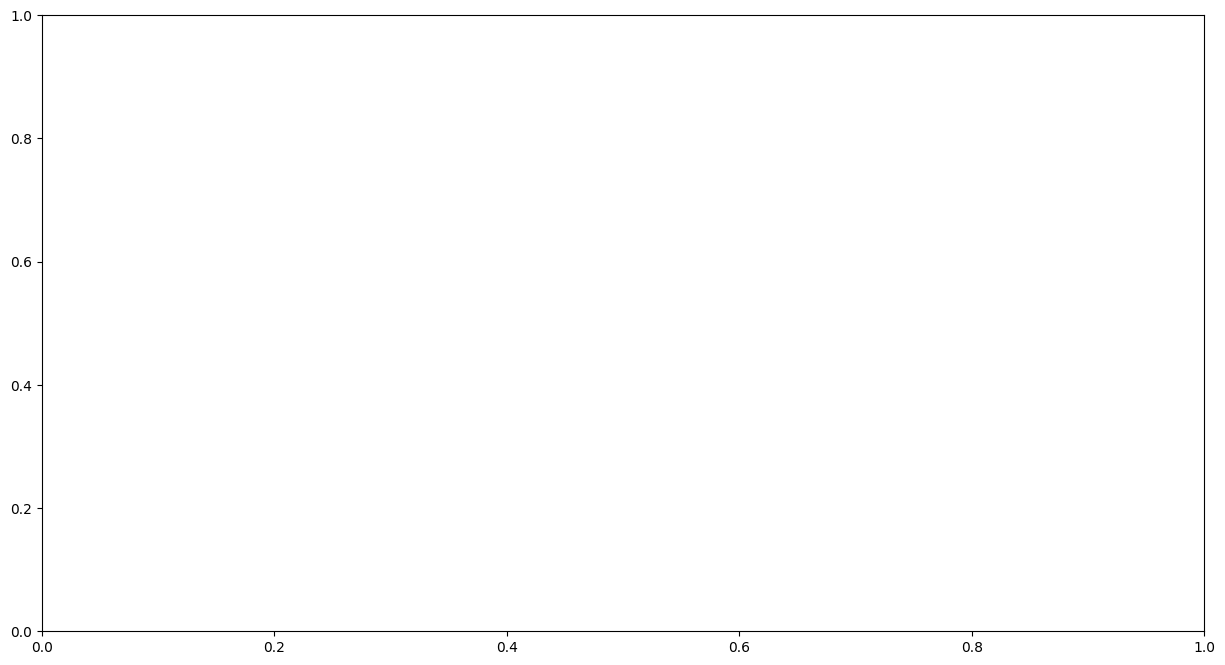

In [71]:
# Aggregate the data by day_of_year and calculate mean close prices
aggregated_df = df.groupby('day_of_year').mean()

# Plot the aggregated data
plt.figure(figsize=(15, 8))
plt.plot(aggregated_df.index.values, aggregated_df['sp500 close'].values, label='S&P 500 Close')
plt.plot(aggregated_df.index.values, aggregated_df['nasdaq close'].values, label='NASDAQ Close')
plt.plot(aggregated_df.index.values, aggregated_df['silver close'].values, label='Silver Close')
plt.plot(aggregated_df.index.values, aggregated_df['oil close'].values, label='Oil Close')
plt.plot(aggregated_df.index.values, aggregated_df['platinum close'].values, label='Platinum Close')
plt.plot(aggregated_df.index.values, aggregated_df['palladium close'].values, label='Palladium Close')
plt.plot(aggregated_df.index.values, aggregated_df['gold close'].values, label='Gold Close')
plt.title("Average Close Prices by Day of Year")
plt.xlabel("Day of Year")
plt.ylabel("Average Price")
plt.legend()
plt.show()

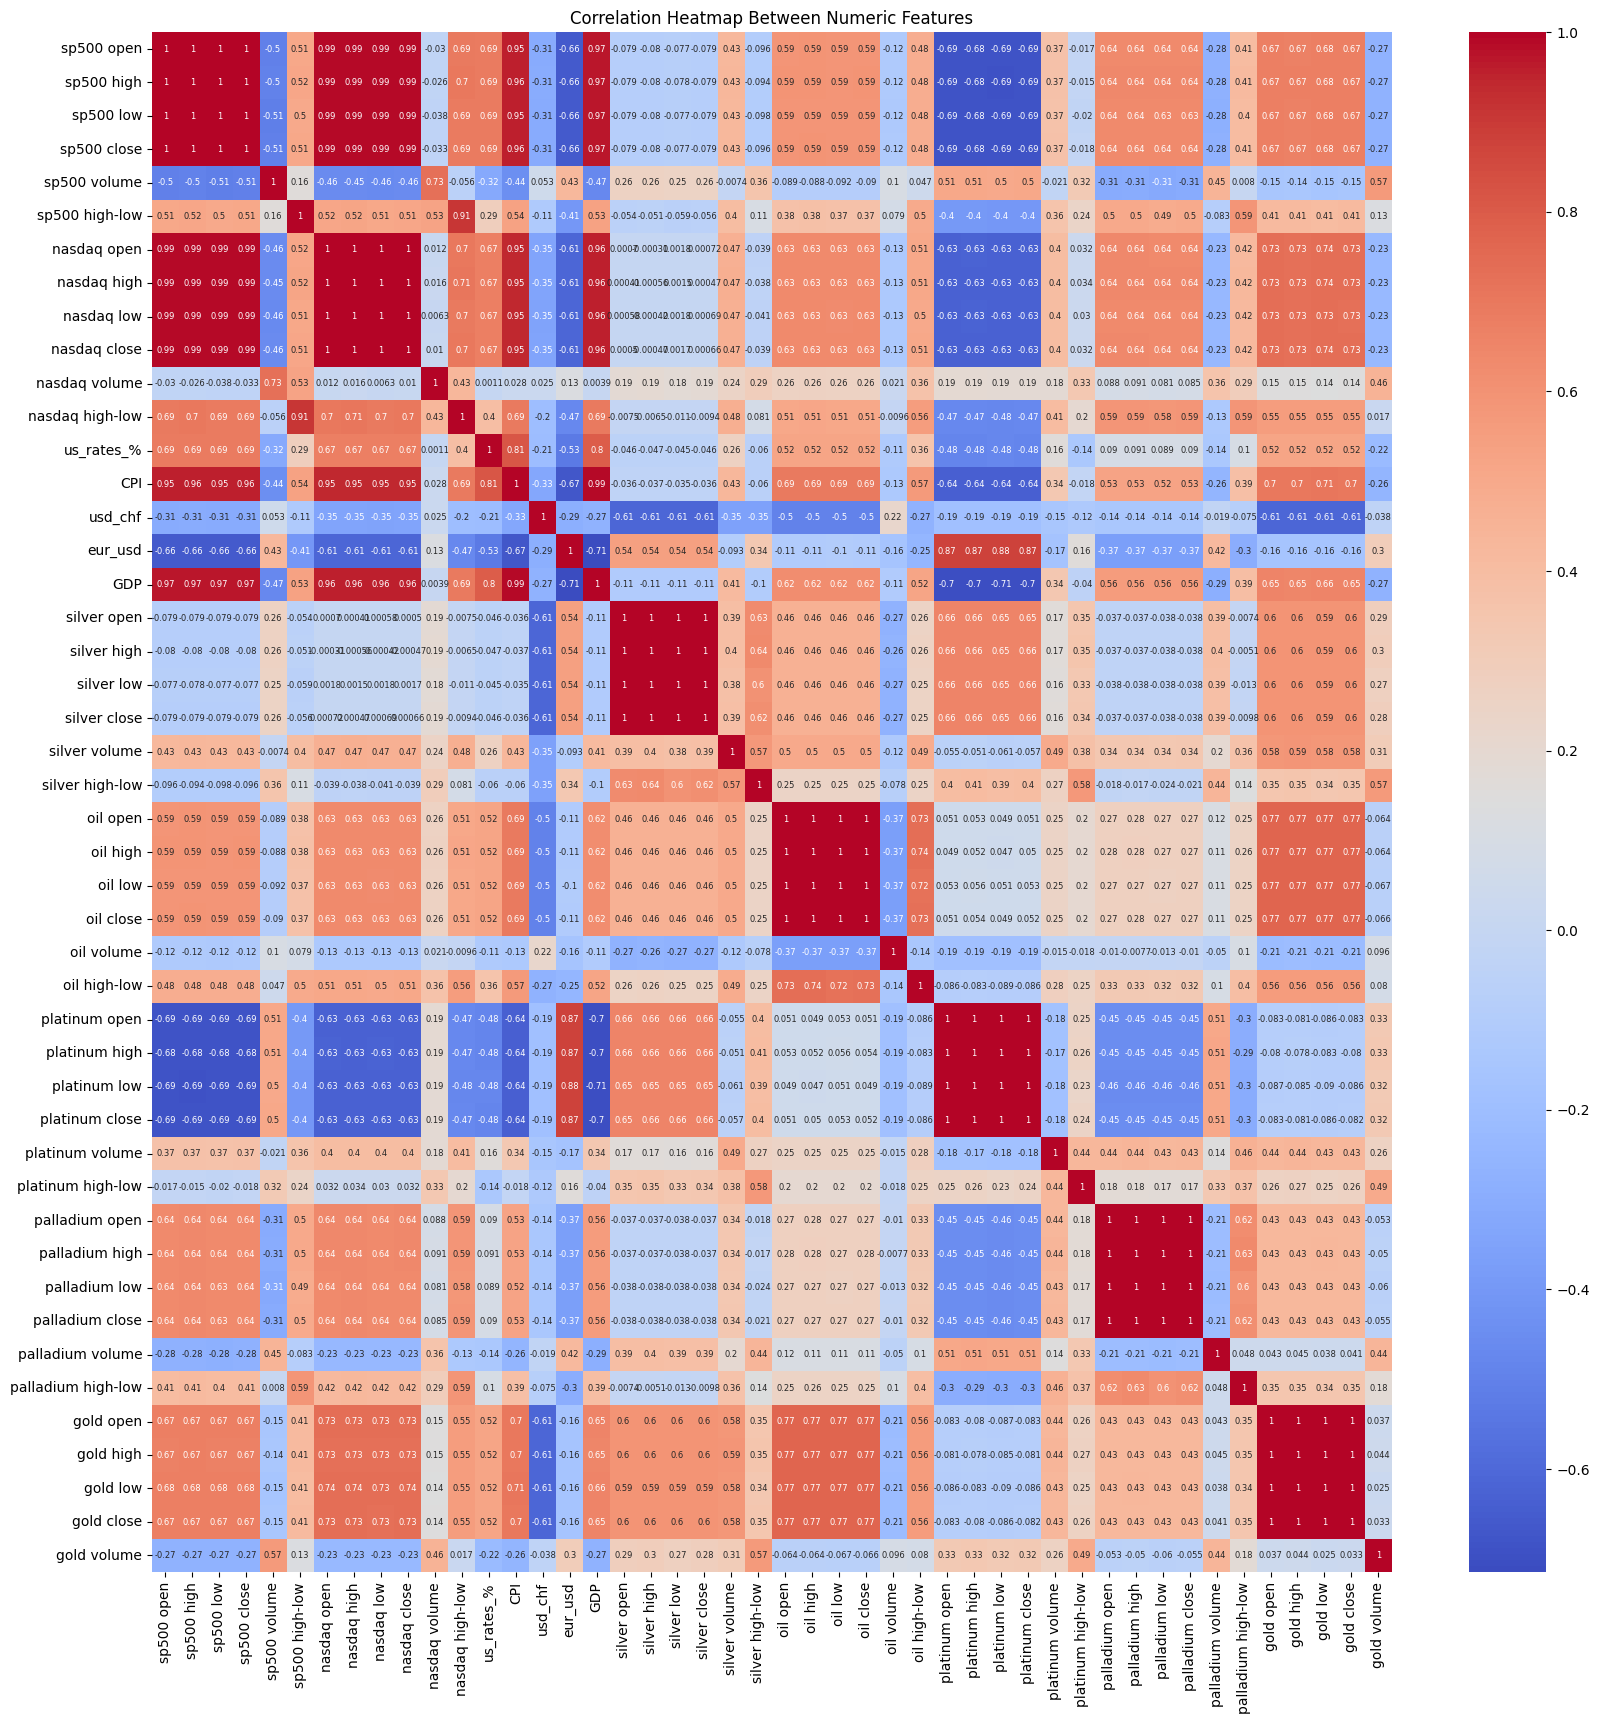

In [64]:
# Correlations
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, annot_kws={'size': 6}, cmap='coolwarm')
plt.title("Correlation Heatmap Between Numeric Features")
plt.show()

In [65]:
df.describe()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
count,3849,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,...,3849.000000,3849.000000,3849.000000,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03
mean,2017-07-11 14:59:23.522992896,270.918475,272.369452,269.341146,270.968896,1.108788e+08,3.028305,183.255692,184.555972,181.834671,...,111.110800,108.848156,109.991656,6.894703e+04,2.262644,145.955102,146.600599,145.266843,145.956649,9.514310e+06
min,2010-04-01 00:00:00,103.110000,103.420000,101.130000,102.200000,2.027001e+07,0.300000,42.670000,42.821500,41.550000,...,42.920000,40.700000,41.860000,3.157000e+03,0.230000,100.920000,100.990000,100.232600,100.500000,1.436508e+06
25%,2013-11-21 00:00:00,177.580000,178.660000,176.920000,178.110000,6.642623e+07,1.280000,83.800000,84.020000,83.280000,...,70.000000,69.020000,69.500000,2.065800e+04,0.870000,120.880000,121.340000,120.440000,120.860000,5.756153e+06
50%,2017-07-11 00:00:00,243.130000,244.300000,242.230000,243.290000,9.176631e+07,2.100000,141.800000,142.410000,140.980000,...,85.000000,83.590000,84.250000,3.764400e+04,1.420000,138.440000,139.150000,137.800000,138.620000,7.993280e+06
75%,2021-03-02 00:00:00,376.560000,379.860000,372.890000,376.700000,1.349688e+08,3.820000,285.860000,288.930000,282.730000,...,145.675000,142.290000,144.252000,8.049100e+04,2.720000,168.020000,168.690000,167.210000,168.030000,1.134715e+07
max,2024-10-23 00:00:00,585.910000,586.120000,582.580000,584.590000,7.095045e+08,22.960000,503.070000,503.520000,498.390000,...,298.210000,277.000100,295.000000,1.199042e+06,45.392300,253.080000,253.940000,252.520000,253.930000,9.369811e+07
std,NaN,120.704068,121.350754,119.996930,120.731340,6.761398e+07,2.658756,122.189654,123.106218,121.161133,...,58.323013,56.749438,57.563495,9.457139e+04,2.545303,29.452205,29.603333,29.264259,29.455924,6.083289e+06


In [68]:
df['day_of_year'] = df['date'].dt.dayofyear
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume,day_of_year
0,2010-04-01,117.80,118.25,117.10,117.80,161083608.0,1.15,48.34,48.70,47.79,...,48.7730,48.92,135299.0,0.5470,109.97,110.4700,109.92,110.26,11370417.0,91
1,2010-04-02,117.80,118.25,117.10,117.80,161083608.0,1.15,48.34,48.70,47.79,...,48.7730,48.92,135299.0,0.5470,109.97,110.4700,109.92,110.26,11370417.0,92
2,2010-04-05,118.25,118.84,117.92,118.76,105621743.0,0.92,48.26,48.72,48.14,...,49.1100,50.38,191249.0,1.8700,110.56,110.9837,110.27,110.89,8207564.0,95
3,2010-04-06,118.42,119.25,118.29,119.04,110194919.0,0.96,48.49,48.90,48.39,...,50.3101,50.81,226947.0,0.7899,110.89,111.5100,110.83,111.03,10321993.0,96
4,2010-04-07,118.80,119.36,117.81,118.36,184432309.0,1.55,48.69,48.87,48.37,...,50.5101,50.89,483783.0,0.7199,111.85,112.9300,111.77,112.49,19127617.0,97


In [67]:
selected_features = ['sp500 open', 'sp500 high', 'sp500 low', 'sp500 volume', 'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP']
X = df[selected_features]
y = df['sp500 close']

print("X:")
display(X)
print("\ny:")
display(y)

X:


,sp500 open,sp500 high,sp500 low,sp500 volume,us_rates_%,CPI,usd_chf,eur_usd,GDP
0,117.80,118.2500,117.1000,161083608.0,0.20,217.403,1.0559,1.3569,14980.193
1,117.80,118.2500,117.1000,161083608.0,0.20,217.403,1.0632,1.3487,14980.193
2,118.25,118.8400,117.9200,105621743.0,0.20,217.403,1.0619,1.3486,14980.193
3,118.42,119.2500,118.2900,110194919.0,0.20,217.403,1.0704,1.3378,14980.193
4,118.80,119.3600,117.8100,184432309.0,0.20,217.403,1.0716,1.3364,14980.193
...,...,...,...,...,...,...,...,...,...
3844,585.91,586.1200,582.1600,34393714.0,5.13,314.686,0.8654,1.0837,29016.714
3845,584.07,585.3900,582.5800,37416801.0,5.13,314.686,0.8659,1.0854,29016.714
3846,583.85,584.8500,580.6001,36439010.0,5.13,314.686,0.8659,1.0854,29016.714
3847,581.05,584.5000,580.3800,34183835.0,5.13,314.686,0.8659,1.0854,29016.714



y:


0       117.80
1       117.80
2       118.76
3       119.04
4       118.36
         ...  
3844    582.35
3845    584.59
3846    583.63
3847    583.32
3848    577.99
Name: sp500 close, Length: 3849, dtype: float64